In [31]:
# Clustering is an unsupervised learning technique
# Grouping “similar” instances together into clusters

In [1]:
import datetime
print(datetime.datetime.now())

2021-07-09 12:50:41.507899


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])    
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)   
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)   
plt.rc('figure', titlesize=BIGGER_SIZE)  
plt.rc('axes', grid=True)

# Read in Data

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,ID,Investor Name,Value Subscribed,Beneficiary Province/State (parsed),Beneficiary Country (parsed)
0,0,Linton Family Trust (2040),1750.0,Ontario,Canada
1,1,Graeme Davis,11375.0,Ontario,Canada
2,2,Jeffrey P Minor,5250.0,Ohio,United States
3,3,Benjamin Gray,1050.0,Michigan,United States
4,4,Felix Gonzalez,1050.0,New York,United States


In [6]:
df = df.drop(['ID','Investor Name'],axis=1)

In [7]:
df.shape
df.info()
df.head()

(1174, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Value Subscribed                     1174 non-null   float64
 1   Beneficiary Province/State (parsed)  1161 non-null   object 
 2   Beneficiary Country (parsed)         1168 non-null   object 
dtypes: float64(1), object(2)
memory usage: 27.6+ KB


,Value Subscribed,Beneficiary Province/State (parsed),Beneficiary Country (parsed)
0,1750.0,Ontario,Canada
1,11375.0,Ontario,Canada
2,5250.0,Ohio,United States
3,1050.0,Michigan,United States
4,1050.0,New York,United States


In [8]:
df = df.rename(columns={'Beneficiary Province/State (parsed)':'Beneficiary State'})
df = df.rename(columns={'Beneficiary Country (parsed)':'Beneficiary Country'})

In [9]:
n_features = df.shape[1]

cat_col_names = list(df.select_dtypes(include=np.object).columns)
num_col_names = list(df.select_dtypes(include=np.number).columns)

print('cat_col_names: {}'.format(cat_col_names))
print('num_col_names: {}'.format(num_col_names))

cat_col_names: ['Beneficiary State', 'Beneficiary Country']
num_col_names: ['Value Subscribed']


<ipython-input-9-f4b08b0876c3>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_col_names = list(df.select_dtypes(include=np.object).columns)


# Data Description

In [14]:
# Descriptive stats of the numeric features
df.describe(include=[np.number]).transpose()
df.describe(include=[object]).transpose()

,count,mean,std,min,25%,50%,75%,max
Value Subscribed,1174.0,43340.046848,605355.929602,0.0,1085.0,2100.0,5250.0,15625001.0


,count,unique,top,freq
Beneficiary State,1161,70,Michigan,210
Beneficiary Country,1168,17,United States,1019


In [11]:
# Descriptive stats of the categorical features
df.describe(include=[np.object]).transpose()

<ipython-input-11-a37cbc70ef65>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).transpose()


,count,unique,top,freq
Beneficiary State,1161,70,Michigan,210
Beneficiary Country,1168,17,United States,1019


# Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler

X_num = df[num_col_names].to_numpy()
X_cat = df[cat_col_names].to_numpy()

# scale all numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

X = np.concatenate((X_num, X_cat), axis=1)
X

array([[-0.06873273904606032, 'Ontario', 'Canada'],
       [-0.05282622622749942, 'Ontario', 'Canada'],
       [-0.06294855256658363, 'Ohio', 'United States'],
       ...,
       [-0.030311280356136387, 'Québec', 'Canada'],
       [0.01348947175970088, 'Québec', 'Canada'],
       [-0.06584064580632198, 'Florida', 'United States']], dtype=object)

# Distance Calculation

In [16]:
from scipy.spatial import distance

# define function to handle both types of features (distance metrics-how far apart two instances are from each other)

def custom_dist(x1, x2, cat_cols=None, num_cols=None):
   
    n = len(x1)
    #print(x1)
    #print(num_cols)
    #print(x1[num_cols])
    #print(x2)

    dist_num = distance.euclidean(x1[num_cols], x2[num_cols])
    #print(dist_num)
    dist_cat = distance.hamming(x1[cat_cols], x2[cat_cols])
    #print(dist_cat)
    
    dist = (dist_num*sum(num_cols) + dist_cat*sum(cat_cols)) / n
    #print(dist)
    return dist

In [17]:
# custom distance metric on all pairs of rows in our dataset to create custom distance matrix.

from scipy.spatial.distance import pdist

cat_cols = [type(x)==str for x in X[1,:]]
num_cols = [not x for x in cat_cols]

Y = pdist(X, custom_dist, cat_cols=cat_cols, num_cols=num_cols)

<Figure size 720x504 with 0 Axes>

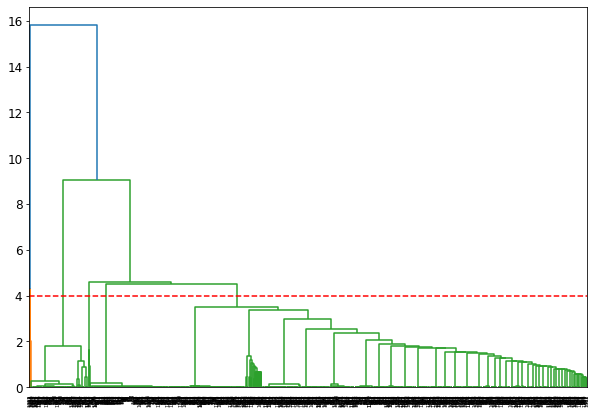

In [29]:
# Perform hierarchical clustering, using custom-built distance matrix. (ward linkage for measuring the distance between clusters)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7));
plt.grid(False)
dend = shc.dendrogram(shc.linkage(Y, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

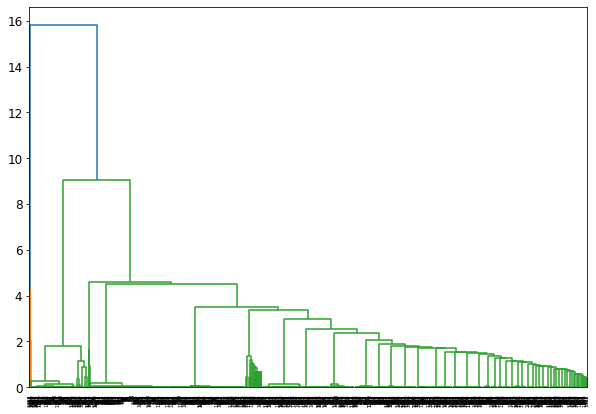

In [24]:
plt.figure(figsize=(10, 7));
plt.grid(False)
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [30]:
# find K=4 clusters
K=4
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

# Show Textual Feature Stats for Each Cluster

In [32]:
from scipy import stats
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
df.describe(include=[np.number]).transpose()
df.describe(include=[np.object]).transpose()
for col in cat_col_names:
    df[col].value_counts()


for i, label in enumerate(set(labels)):
    n = df.iloc[labels==label].shape[0]
      
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(n))

    df.iloc[labels==label].describe(include=[np.number]).transpose()
    df.iloc[labels==label].describe(include=[object]).transpose()
    for col in cat_col_names:
        df.iloc[labels==label][col].value_counts()

All Data:
Number of Instances: 1174


,count,mean,std,min,25%,50%,75%,max
Value Subscribed,1174.00,43340.05,605355.93,0.00,1085.00,2100.00,5250.00,15625001.00


<ipython-input-32-6011e9244a56>:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).transpose()


,count,unique,top,freq
Beneficiary State,1161,70,Michigan,210
Beneficiary Country,1168,17,United States,1019


Michigan            210
California          119
Ontario              97
Florida              83
Texas                62
                   ... 
Wyoming               1
Estado de México      1
Nova Scotia           1
Victoria              1
North Dakota          1
Name: Beneficiary State, Length: 70, dtype: int64

United States     1019
Canada             121
United Kingdom       5
Australia            4
Switzerland          3
Germany              2
Netherlands          2
Cayman Islands       2
New Zealand          2
Saudi Arabia         1
Ireland              1
Malta                1
Dubai                1
Mexico               1
Singapore            1
Spain                1
France               1
Name: Beneficiary Country, dtype: int64


Cluster 1:
Number of Instances: 3


,count,mean,std,min,25%,50%,75%,max
Value Subscribed,3.00,11108333.83,4326975.00,7000000.00,8850000.25,10700000.50,13162500.75,15625001.00


,count,unique,top,freq
Beneficiary State,3,1,New York,3
Beneficiary Country,3,1,United States,3


New York    3
Name: Beneficiary State, dtype: int64

United States    3
Name: Beneficiary Country, dtype: int64


Cluster 2:
Number of Instances: 121


,count,mean,std,min,25%,50%,75%,max
Value Subscribed,121.00,25977.90,63078.68,1050.00,2100.00,7770.00,20125.00,542500.00


,count,unique,top,freq
Beneficiary State,121,5,Ontario,97
Beneficiary Country,121,1,Canada,121


Ontario             97
British Columbia     9
Québec               7
Alberta              7
Nova Scotia          1
Name: Beneficiary State, dtype: int64

Canada    121
Name: Beneficiary Country, dtype: int64


Cluster 3:
Number of Instances: 3


,count,mean,std,min,25%,50%,75%,max
Value Subscribed,3.00,2666666.92,1040832.94,1500000.25,2250000.38,3000000.50,3250000.25,3500000.00


,count,unique,top,freq
Beneficiary State,1,1,New York,1
Beneficiary Country,3,2,Cayman Islands,2


New York    1
Name: Beneficiary State, dtype: int64

Cayman Islands    2
United States     1
Name: Beneficiary Country, dtype: int64


Cluster 4:
Number of Instances: 1047


,count,mean,std,min,25%,50%,75%,max
Value Subscribed,1047.00,6125.01,17728.90,0.00,1050.00,2012.50,5075.00,350000.00


,count,unique,top,freq
Beneficiary State,1036,65,Michigan,210
Beneficiary Country,1041,15,United States,1015


Michigan      210
California    119
Florida        83
Texas          62
New York       51
             ... 
Wellington      1
Bayern          1
Wyoming         1
Victoria        1
Hamburg         1
Name: Beneficiary State, Length: 65, dtype: int64

United States     1015
United Kingdom       5
Australia            4
Switzerland          3
Germany              2
New Zealand          2
Netherlands          2
Spain                1
Singapore            1
Mexico               1
Ireland              1
Saudi Arabia         1
Malta                1
Dubai                1
France               1
Name: Beneficiary Country, dtype: int64